# IRC analysis

In this notebook, we combine the both the forward and backward irc search into one trajectory and one list of energy values so that we can plot/analyze the minimum free energy path for converting the chloro-alcohol into the epoxide. 

In [1]:
import pickle
import sys
sys.path.append("..")
from helpers import *

import psi4

import matplotlib.pyplot as plt 

## Download the other part of the trajectory from your colleague

This load the pickled objects from disk

In [2]:
backward_e, traj_backward, traj_backward_np = pickle.load( open( "backward.p", "rb" ) )
forward_e, traj_forward, traj_forward_np= pickle.load( open( "forward.p", "rb" ) )

Look at the energy list and find out which you need to reverse. 

Remember that we substracted the highest energy from all the values. Think about which point is the highest energy point on the minimum energy path connecting reactant and products. 

You can use `variablename.reverse()` to reverse the list. 

In [3]:
backward_e, traj_backward, traj_backward_np = pickle.load( open( "backward.p", "rb" ) )
forward_e, traj_forward, traj_forward_np= pickle.load( open( "forward.p", "rb" ) )
backward_e  = list(backward_e)
forward_e   = list(forward_e)
traj_backward = list(traj_backward)
traj_forward  = list(traj_forward)

# ici c’est le forward qui doit aller min → TS (réactif → TS)
forward_e_rev    = forward_e[::-1]
traj_forward_rev = traj_forward[::-1]

backward_e_rev    = backward_e[::-1]
traj_backward_rev = traj_backward[::-1]

# chemin : réactif (forward_rev) → TS → produit (backward)
energies = ( backward_e_rev + forward_e  )
traj     = ( traj_backward_rev + traj_forward )



print(energies[0])
print(energies[50])

-3.3468882531742565
0.0


## Visualize the trajectory

In [4]:
drawXYZGeomSlider(traj)

interactive(children=(IntSlider(value=0, description='conf', max=151), Output()), _dom_classes=('widget-intera…

```{admonition} Exercise 8
:class: exercise
Is the stereochemistry at the carbon at which the reaction takes
    place retained?
```



## Plot the minium energy path

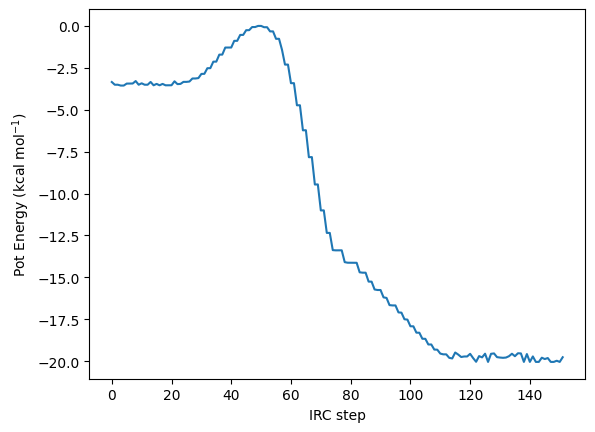

In [5]:
fig, ax =  plt.subplots(1)

ax.plot(energies)
ax.set_xlabel('IRC step')
ax.set_ylabel('Pot Energy (kcal mol$^{-1}$)')

plt.show()

```{admonition} Exercise 7
:class: exercise
Take a screenshot of the graph of the potential energy profile you
    recorded. 
Why is the barrier for the epoxide formation so low? Will this be
    the overall barrier for the reaction as depicted in the previous section?
```


## Analyse Bonds

For the visualization we used a list of xyz file formated strings. 
For the analysis it is more convenient to work with a list of numpy arrays. 

Let's have a look at different bond distances involving different atoms in the molecule.

We can fist have a look at the first and last conformations, which correspond to the starting and ending point of the IRC that we performed.

In [6]:
drawXYZSideBySide_labeled(traj[0], traj[-1])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
traj_array = traj_backward_np[::-1] + traj_forward_np

In [8]:
bond_length_XX_ccl = []
bond_length_XX_cco = []
bond_length_XX_cc = []

for coord in traj_array:
    # collect bond length between atom 0 and 1 over the trajectory
    bond_length_XX_ccl.append(calculate_bond(coord[0], coord[2])) 
    bond_length_XX_cco.append(calculate_bond(coord[1], coord[5])) 
    bond_length_XX_cc.append(calculate_bond(coord[0], coord[1])) 

```{admonition} Exercise  9
:class: exercise
How do the C-Cl and the two relevant C-O bond lengths change during
    the trajectory? Does the C-C bond in the ring contract as the
    epoxide is formed? Show a graph depicting the evolution of these
    parameters as the reaction progresses. 
```


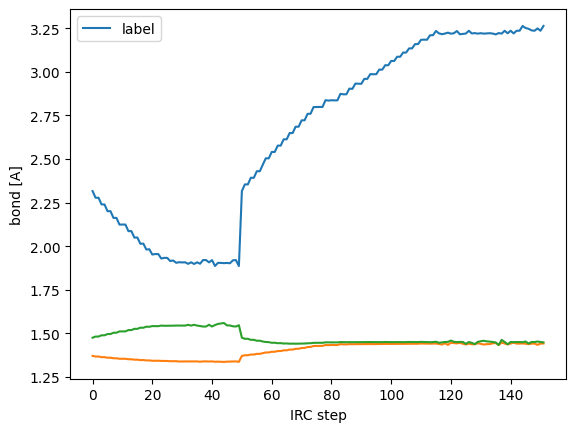

In [9]:
fig, ax = plt.subplots(1)

# add a call to ax.plot for each distance that you want to plot 
ax.plot(bond_length_XX_ccl)
ax.plot(bond_length_XX_cco)
ax.plot(bond_length_XX_cc)
# add an entry to the list of labels for each distance that you want to plot
plt.legend(["label"]) 

ax.set_xlabel('IRC step')
ax.set_ylabel('bond [A]')
plt.show()

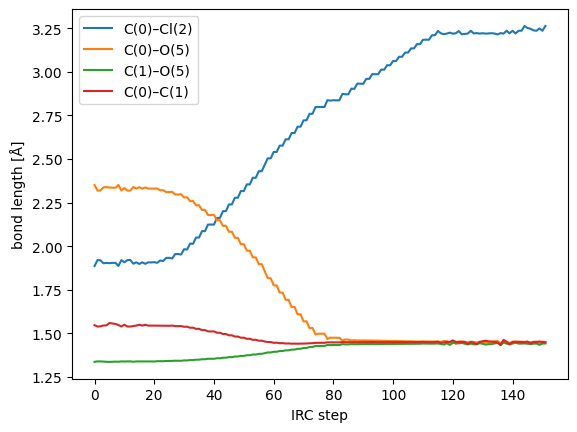

In [14]:
# indices des atomes dans la numérotation de la figure
i_Cstar = 0   # carbone chiral (porte Cl et l'un des C-O)
i_C2    = 1   # autre carbone du futur cycle époxyde
i_Cl    = 2   # chlore
i_O     = 5   # oxygène

# listes pour stocker l'évolution des longueurs de liaison
bond_CCl  = []
bond_C0O  = []   # C*–O
bond_C1O  = []   # C2–O
bond_CC   = []   # C*–C2 (liaison C-C de l'anneau)

for coord in traj_array:
    # coord est un array (N_atomes, 3) pour un pas IRC donné
    bond_CCl.append(calculate_bond(coord[i_Cstar], coord[i_Cl]))
    bond_C0O.append(calculate_bond(coord[i_Cstar], coord[i_O]))
    bond_C1O.append(calculate_bond(coord[i_C2],    coord[i_O]))
    bond_CC.append( calculate_bond(coord[i_Cstar], coord[i_C2]))

# tracé des quatre liaisons sur le même graphe
fig, ax = plt.subplots(1)

ax.plot(bond_CCl, label="C(0)–Cl(2)")
ax.plot(bond_C0O, label="C(0)–O(5)")
ax.plot(bond_C1O, label="C(1)–O(5)")
ax.plot(bond_CC,  label="C(0)–C(1)")

ax.set_xlabel("IRC step")
ax.set_ylabel("bond length [Å]")
ax.legend()
plt.show()


```{admonition} Exercise 10
:class: exercise
What is happening to the methyl group as the reaction proceeds? Find
    a suitable parameter (angle, dihedral) to describe and characterise
    possible changes you observe, change the code below. Explain in your report what atoms you considered and take and include the evolutions of the chosen parameters during the IRC procedure. 
```



In [15]:
#Modify the code below, chosing proper atoms to monitor the changes of the methyl group 
methyl_angle = []
methyl_dihedral = []

for coord in traj_array:
    #modify here
    methyl_angle.append(calculate_angle(coord[#], coord[#], coord[#])) 
    methyl_dihedral.append(calculate_dihedral(coord[#], coord[#], coord[#], coord[#])) 

fig, ax = plt.subplots(1)
ax.plot(methyl_angle)
ax.plot(methyl_dihedral)

plt.legend(["angle (#-#-#)", "dihedral (#-#-#-#)"])
        
ax.set_xlabel('IRC step')
ax.set_ylabel('angle [deg]')
plt.show()

SyntaxError: '[' was never closed (3682964810.py, line 8)

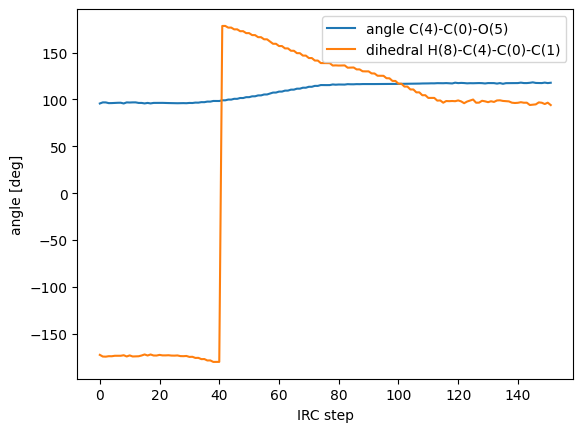

In [16]:
# indices des atomes
i_Cm = 4   # carbone du méthyle
i_Cs = 0   # carbone chiral
i_C2 = 1   # autre carbone de la chaîne (futur cycle)
i_O  = 5   # oxygène
i_Hm = 8   # un hydrogène du méthyle

methyl_angle    = []
methyl_dihedral = []

for coord in traj_array:
    # angle C(méthyle) – C* – O
    methyl_angle.append(
        calculate_angle(coord[i_Cm], coord[i_Cs], coord[i_O])
    )
    # dièdre H(méthyle) – C(méthyle) – C* – C2
    methyl_dihedral.append(
        calculate_dihedral(coord[i_Hm], coord[i_Cm], coord[i_Cs], coord[i_C2])
    )

fig, ax = plt.subplots(1)
ax.plot(methyl_angle)
ax.plot(methyl_dihedral)

plt.legend(["angle C(4)-C(0)-O(5)",
            "dihedral H(8)-C(4)-C(0)-C(1)"])

ax.set_xlabel('IRC step')
ax.set_ylabel('angle [deg]')
plt.show()


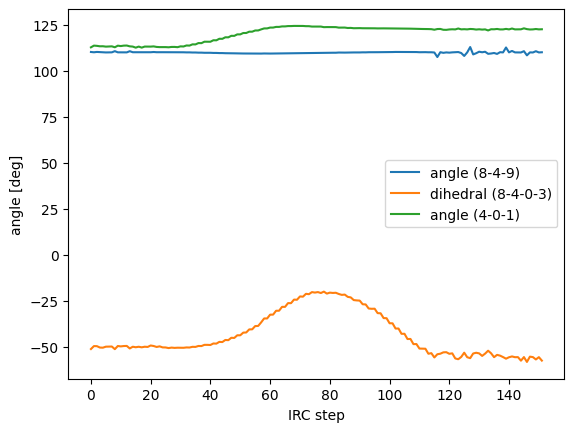

In [17]:
# Modify the code below, chosing proper atoms to monitor the changes of the methyl group
methyl_angle = []
methyl_dihedral = []
C_C_C_angle = []

for coord in traj_array:
    # modify here
    methyl_angle.append(calculate_angle(coord[8], coord[4], coord[9]))
    methyl_dihedral.append(calculate_dihedral(coord[8], coord[4], coord[0], coord[3]))
    C_C_C_angle.append(calculate_angle(coord[4], coord[0], coord[1]))

fig, ax = plt.subplots(1)
ax.plot(methyl_angle)
ax.plot(methyl_dihedral)
ax.plot(C_C_C_angle)

plt.legend(["angle (8-4-9)", "dihedral (8-4-0-3)", "angle (4-0-1)"])

ax.set_xlabel('IRC step')
ax.set_ylabel('angle [deg]')
plt.show()
